# MLB Wins and Loses Model

In [1]:
%matplotlib inline

In [2]:
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Datasets
reg_bat = pd.DataFrame.from_csv('data/batting.csv', index_col = None, encoding = ('utf-8'))
post_bat = pd.DataFrame.from_csv('data/batting_postseason.csv', index_col = None, encoding = ('utf-8'))
reg_pit = pd.DataFrame.from_csv('data/pitching.csv', index_col = None, encoding = ('utf-8'))
post_pit = pd.DataFrame.from_csv('data/pitching_postseason.csv', index_col = None, encoding = ('utf-8'))
post = pd.DataFrame.from_csv('data/postseason.csv', index_col = None, encoding = ('utf-8'))
team = pd.DataFrame.from_csv('data/team.csv', index_col = None, encoding = ('utf-8'))
player = pd.DataFrame.from_csv('data/player.csv', index_col = None, encoding = ('utf-8'))
park = pd.DataFrame.from_csv('data/park.csv', index_col = None, encoding = ('utf-8'))
reg_field = pd.DataFrame.from_csv('data/fielding.csv', index_col = None, encoding = ('utf-8'))
field_out = pd.DataFrame.from_csv('data/fielding_outfield.csv', index_col = None, encoding = ('utf-8'))
post_field = pd.DataFrame.from_csv('data/fielding_postseason.csv', index_col = None, encoding = ('utf-8'))

In [4]:
####### Column Labeling #######

#Regular Season Batting
reg_bat = reg_bat.fillna(0)
r_ab = reg_bat['ab']
r_bb = reg_bat['bb']
r_hbp = reg_bat['hbp']
r_ibb = reg_bat['ibb']
r_sf = reg_bat['sf']
r_sh = reg_bat['sh']
r_h = reg_bat['h']
r_dou = reg_bat['double']
r_tri = reg_bat['triple']
r_hr = reg_bat['hr']
r_sin = r_h - (r_dou + r_tri + r_hr)
rb_teamid = reg_bat['team_id']
r_bso = reg_bat['so']
r_sb = reg_bat['sb']
#Postseason Batting
post_bat = post_bat.fillna(0)
p_ab = post_bat['ab']
p_bb = post_bat['bb']
p_hbp = post_bat['hbp']
p_ibb = post_bat['ibb']
p_sf = post_bat['sf']
p_sh = post_bat['sh']
p_h = post_bat['h']
p_dou = post_bat['double']
p_tri = post_bat['triple']
p_hr = post_bat['hr']
p_sin = p_h - (p_dou + p_tri + p_hr)
pb_teamid = post_bat['team_id']
p_bso = post_bat['so']
p_sb = post_bat['sb']

In [5]:
####### Individual PLayer Statistic Calculations #######

#Batting Average
reg_bat['bat_avg'] = r_h/r_ab
post_bat['bat_avg'] = p_h/p_ab
#Slugging Percentage
reg_bat['slg'] = (r_sin + 2*r_dou + 3*r_tri + 4*r_hr)/r_ab
r_slg = reg_bat['slg']
post_bat['slg'] = (p_sin + 2*p_dou + 3*p_tri + 4*p_hr)/p_ab
p_slg = post_bat['slg']
#On Base Percentage
reg_bat['obp'] = (r_h + r_bb + r_hbp)/(r_ab + r_bb + r_hbp + r_sf)
r_obp = reg_bat['obp']
post_bat['obp'] = (p_h + p_bb + p_hbp)/(p_ab + p_bb + p_hbp + p_sf)
p_obp = post_bat['obp']
#On Base PLus Slugging
reg_bat['ops'] = r_slg + r_obp
r_ops = reg_bat['ops']
post_bat['ops'] = p_slg + p_obp
p_ops = post_bat['ops']
#Weighted On Base Average
reg_bat['woba'] = (.69*r_bb + .72*r_hbp + .89*r_sin + 1.27*r_dou + 1.62*r_tri + 2.10*r_hr)/(r_ab + r_bb + r_ibb + r_sf + r_hbp)
r_woba = reg_bat['woba']
post_bat['woba'] = (.69*p_bb + .72*p_hbp + .89*p_sin + 1.27*p_dou + 1.62*p_tri + 2.10*p_hr)/(p_ab + p_bb + p_ibb + p_sf + p_hbp)
p_woba = post_bat['woba']
#Strikeout Percentage
reg_bat['kperc'] = r_bso / (r_ab + r_bb + r_hbp + r_sf + r_sh)
r_kperc = reg_bat['kperc']
post_bat['kperc'] = p_bso / (p_ab + p_bb + p_hbp + p_sf + p_sh)
p_kperc = post_bat['kperc']

In [6]:
####### Team Tabels #######

#Team Groupby
team_reg_bat = reg_bat.groupby(['team_id', 'year'])['ab', 'r', 'h', 'double', 'triple', 'hr','rbi', 'sb', 'cs', 'so', 'bb', 'ibb', 'hbp', 'sh', 'sf'].sum().reset_index()
team_post_bat = post_bat.groupby(['team_id', 'year'])['ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'so', 'bb', 'ibb', 'hbp', 'sh', 'sf'].sum().reset_index()

In [7]:
####### Team Column Labeling #######

#Team Regular Season Batting
team_reg_bat = team_reg_bat.fillna(0)
tr_ab = team_reg_bat['ab']
tr_bb = team_reg_bat['bb']
tr_hbp = team_reg_bat['hbp']
tr_ibb = team_reg_bat['ibb']
tr_sf = team_reg_bat['sf']
tr_sh = team_reg_bat['sh']
tr_h = team_reg_bat['h']
tr_dou = team_reg_bat['double']
tr_tri = team_reg_bat['triple']
tr_hr = team_reg_bat['hr']
tr_sin = tr_h - (tr_dou + tr_tri + tr_hr)
trb_teamid = team_reg_bat['team_id']
tr_bso = team_reg_bat['so']
tr_sb = team_reg_bat['sb']
#Team Postseason Batting
team_post_bat = team_post_bat.fillna(0)
tp_ab = team_post_bat['ab']
tp_bb = team_post_bat['bb']
tp_hbp = team_post_bat['hbp']
tp_ibb = team_post_bat['ibb']
tp_sf = team_post_bat['sf']
tp_sh = team_post_bat['sh']
tp_h = team_post_bat['h']
tp_dou = team_post_bat['double']
tp_tri = team_post_bat['triple']
tp_hr = team_post_bat['hr']
tp_sin = tp_h - (tp_dou + tp_tri + tp_hr)
tpb_teamid = team_post_bat['team_id']
tp_bso = team_post_bat['so']
tp_sb = team_post_bat['sb']

In [8]:
####### Team Batting Statistic Calculations #######

#Batting Average
team_reg_bat['bat_avg'] = tr_h/tr_ab
team_post_bat['bat_avg'] = tp_h/tp_ab
#Slugging Percentage
team_reg_bat['slg'] = (tr_sin + 2*tr_dou + 3*tr_tri + 4*tr_hr)/tr_ab
tr_slg = team_reg_bat['slg']
team_post_bat['slg'] = (tp_sin + 2*tp_dou + 3*tp_tri + 4*tp_hr)/tp_ab
tp_slg = team_post_bat['slg']
#On Base Percentage
team_reg_bat['obp'] = (tr_h + tr_bb + tr_hbp)/(tr_ab + tr_bb + tr_hbp + tr_sf)
tr_obp = team_reg_bat['obp']
team_post_bat['obp'] = (tp_h + tp_bb + tp_hbp)/(tp_ab + tp_bb + tp_hbp + tp_sf)
tp_obp = team_post_bat['obp']
#On Base PLus Slugging
team_reg_bat['ops'] = tr_slg + tr_obp
tr_ops = team_reg_bat['ops']
team_post_bat['ops'] = tp_slg + tp_obp
tp_ops = team_post_bat['ops']
#Weighted On Base Average
team_reg_bat['woba'] = (.69*tr_bb + .72*tr_hbp + .89*tr_sin + 1.27*tr_dou + 1.62*tr_tri + 2.10*tr_hr)/(tr_ab + tr_bb + tr_ibb + tr_sf + tr_hbp)
tr_woba = team_reg_bat['woba']
team_post_bat['woba'] = (.69*tp_bb + .72*tp_hbp + .89*tp_sin + 1.27*tp_dou + 1.62*tp_tri + 2.10*tp_hr)/(tp_ab + tp_bb + tp_ibb + tp_sf + tp_hbp)
tp_woba = team_post_bat['woba']
#Strikeout Percentage
team_reg_bat['kperc'] = tr_bso / (tr_ab + tr_bb + tr_hbp + tr_sf + tr_sh)
tr_kperc = team_reg_bat['kperc']
team_post_bat['kperc'] = tp_bso / (tp_ab + tp_bb + tp_hbp + tp_sf + tp_sh)
tp_kperc = team_post_bat['kperc']

In [9]:
t_reg = team[['team_id', 'year', 'franchise_id', 'w', 'l']]
t_post = post[['team_id_winner', 'year', 'wins', 'losses']]
t_post.columns = ['team_id', 'year', 'w', 'l']

In [20]:
team_rb = pd.merge(team_reg_bat, t_reg, how='left', left_on=['team_id', 'year'], right_on=['team_id', 'year'])
team_rb = team_rb.loc[team_rb['year'] >= 1961, :]

In [18]:
team_pb = pd.merge(team_post_bat, t_post, how='left', left_on=['team_id', 'year'], right_on=['team_id', 'year'])
team_pb = team_pb.loc[team_pb['year'] >= 1961, :]

In [12]:
fig = plt.figure()

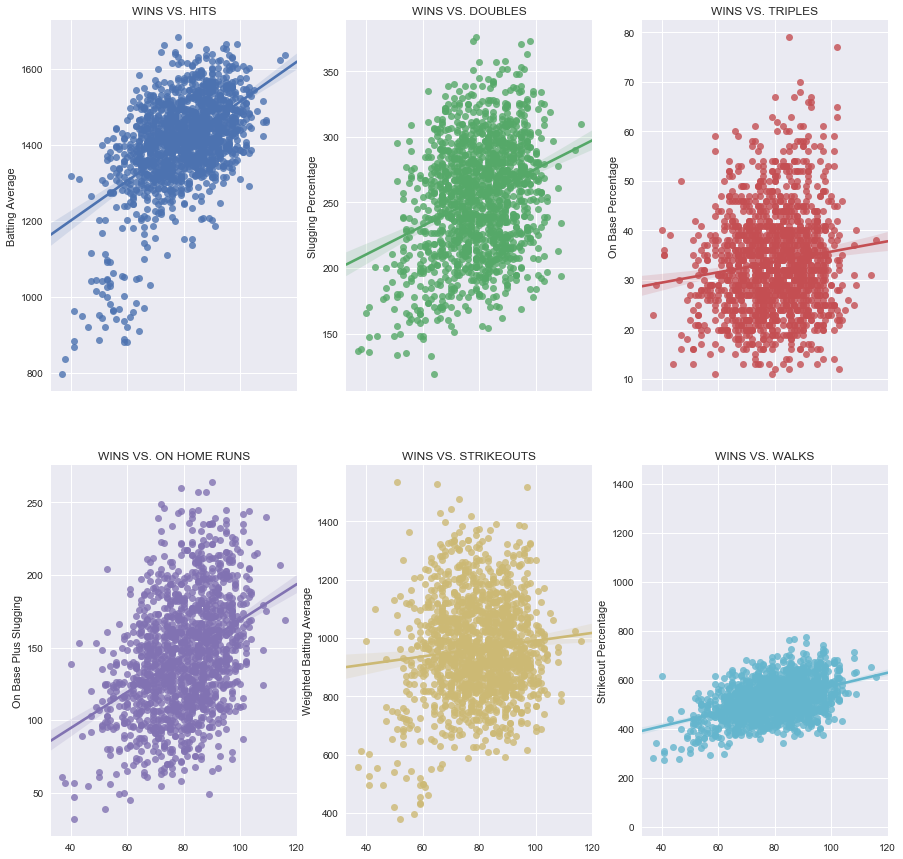

In [15]:
####### REGULAR SEASON STATS TO WINS #######

fig, ax = plt.subplots(2,3,figsize=(15,15), sharex = True)

sns.regplot(x='w', y='h', data=team_rb, ax=ax[0,0])
ax[0,0].set_title('WINS VS. HITS')
ax[0,0].set_ylabel('Batting Average')
ax[0,0].set_xlabel('')

sns.regplot(x='w', y='double', data=team_rb, ax=ax[0,1])
ax[0,1].set_title('WINS VS. DOUBLES')
ax[0,1].set_ylabel('Slugging Percentage')
ax[0,1].set_xlabel('')

sns.regplot(x='w', y='triple', data=team_rb, ax=ax[0,2])
ax[0,2].set_title('WINS VS. TRIPLES')
ax[0,2].set_ylabel('On Base Percentage')
ax[0,2].set_xlabel('')

sns.regplot(x='w', y='hr', data=team_rb, ax=ax[1,0])
ax[1,0].set_title('WINS VS. ON HOME RUNS')
ax[1,0].set_ylabel('On Base Plus Slugging')
ax[1,0].set_xlabel('')

sns.regplot(x='w', y='so', data=team_rb, ax=ax[1,1])
ax[1,1].set_title('WINS VS. STRIKEOUTS')
ax[1,1].set_ylabel('Weighted Batting Average')
ax[1,1].set_xlabel('')

sns.regplot(x='w', y='bb', data=team_rb, ax=ax[1,2])
ax[1,2].set_title('WINS VS. WALKS')
ax[1,2].set_ylabel('Strikeout Percentage')
ax[1,2].set_xlabel('')
None

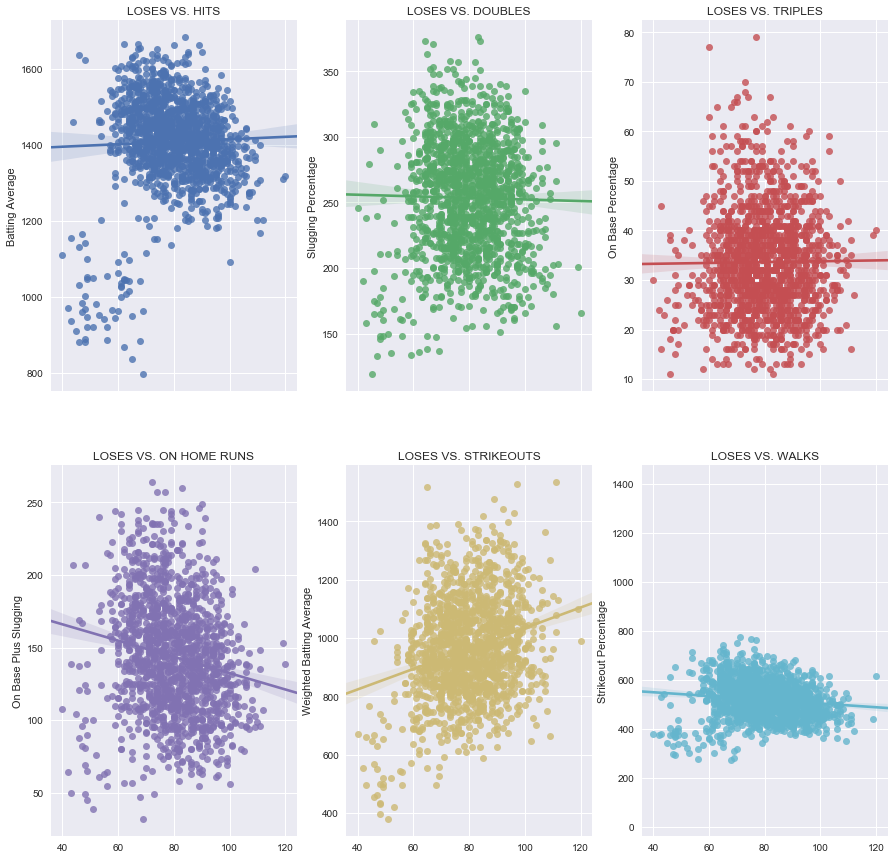

In [24]:
####### REGULAR SEASON STATS TO LOSES #######

fig, ax = plt.subplots(2,3,figsize=(15,15), sharex = True)

sns.regplot(x='l', y='h', data=team_rb, ax=ax[0,0])
ax[0,0].set_title('LOSES VS. HITS')
ax[0,0].set_ylabel('Batting Average')
ax[0,0].set_xlabel('')

sns.regplot(x='l', y='double', data=team_rb, ax=ax[0,1])
ax[0,1].set_title('LOSES VS. DOUBLES')
ax[0,1].set_ylabel('Slugging Percentage')
ax[0,1].set_xlabel('')

sns.regplot(x='l', y='triple', data=team_rb, ax=ax[0,2])
ax[0,2].set_title('LOSES VS. TRIPLES')
ax[0,2].set_ylabel('On Base Percentage')
ax[0,2].set_xlabel('')

sns.regplot(x='l', y='hr', data=team_rb, ax=ax[1,0])
ax[1,0].set_title('LOSES VS. ON HOME RUNS')
ax[1,0].set_ylabel('On Base Plus Slugging')
ax[1,0].set_xlabel('')

sns.regplot(x='l', y='so', data=team_rb, ax=ax[1,1])
ax[1,1].set_title('LOSES VS. STRIKEOUTS')
ax[1,1].set_ylabel('Weighted Batting Average')
ax[1,1].set_xlabel('')

sns.regplot(x='l', y='bb', data=team_rb, ax=ax[1,2])
ax[1,2].set_title('LOSES VS. WALKS')
ax[1,2].set_ylabel('Strikeout Percentage')
ax[1,2].set_xlabel('')
None

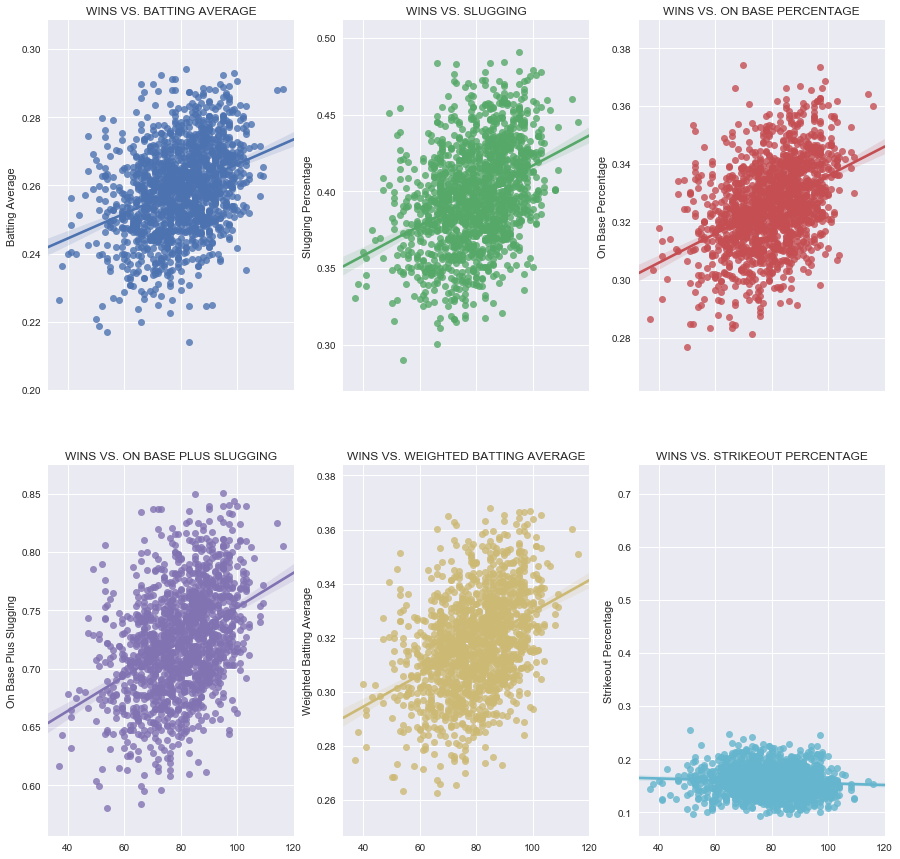

In [13]:
####### REGULAR SEASON CALCUALTED STATS TO WINS #######

fig, ax = plt.subplots(2,3,figsize=(15,15), sharex = True)

sns.regplot(x='w', y='bat_avg', data=team_rb, ax=ax[0,0])
ax[0,0].set_title('WINS VS. BATTING AVERAGE')
ax[0,0].set_ylabel('Batting Average')
ax[0,0].set_xlabel('')

sns.regplot(x='w', y='slg', data=team_rb, ax=ax[0,1])
ax[0,1].set_title('WINS VS. SLUGGING')
ax[0,1].set_ylabel('Slugging Percentage')
ax[0,1].set_xlabel('')

sns.regplot(x='w', y='obp', data=team_rb, ax=ax[0,2])
ax[0,2].set_title('WINS VS. ON BASE PERCENTAGE')
ax[0,2].set_ylabel('On Base Percentage')
ax[0,2].set_xlabel('')

sns.regplot(x='w', y='ops', data=team_rb, ax=ax[1,0])
ax[1,0].set_title('WINS VS. ON BASE PLUS SLUGGING')
ax[1,0].set_ylabel('On Base Plus Slugging')
ax[1,0].set_xlabel('')

sns.regplot(x='w', y='woba', data=team_rb, ax=ax[1,1])
ax[1,1].set_title('WINS VS. WEIGHTED BATTING AVERAGE')
ax[1,1].set_ylabel('Weighted Batting Average')
ax[1,1].set_xlabel('')

sns.regplot(x='w', y='kperc', data=team_rb, ax=ax[1,2])
ax[1,2].set_title('WINS VS. STRIKEOUT PERCENTAGE')
ax[1,2].set_ylabel('Strikeout Percentage')
ax[1,2].set_xlabel('')
None

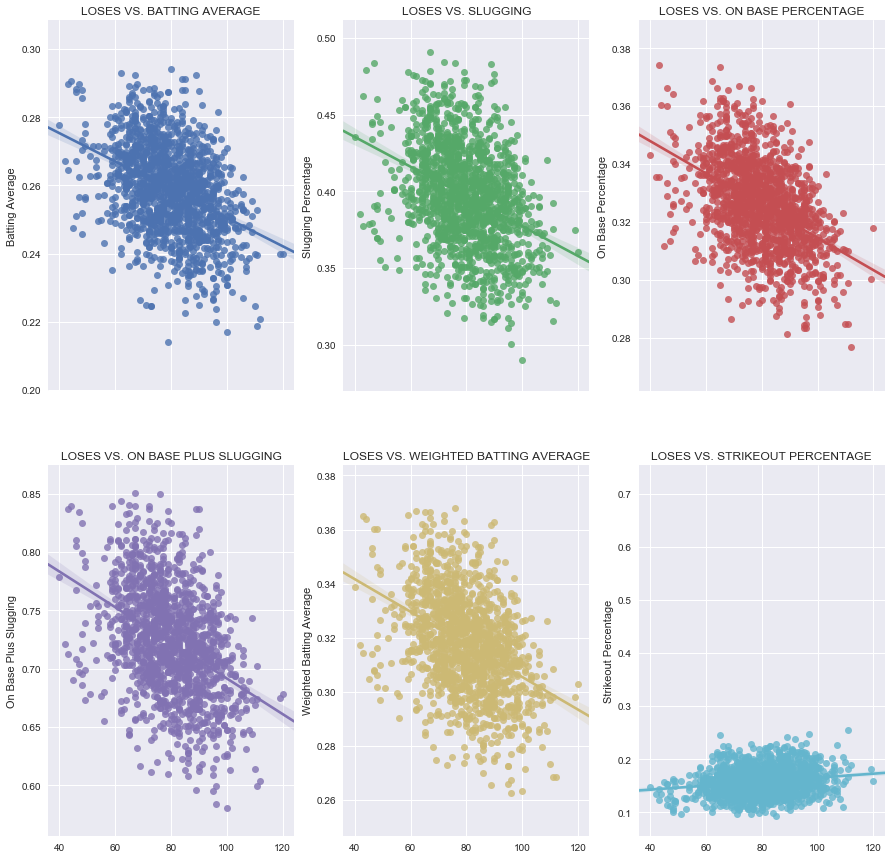

In [23]:
####### REGULAR SEASON CALCUALTED STATS TO WINS #######

fig, ax = plt.subplots(2,3,figsize=(15,15), sharex = True)

sns.regplot(x='l', y='bat_avg', data=team_rb, ax=ax[0,0])
ax[0,0].set_title('LOSES VS. BATTING AVERAGE')
ax[0,0].set_ylabel('Batting Average')
ax[0,0].set_xlabel('')

sns.regplot(x='l', y='slg', data=team_rb, ax=ax[0,1])
ax[0,1].set_title('LOSES VS. SLUGGING')
ax[0,1].set_ylabel('Slugging Percentage')
ax[0,1].set_xlabel('')

sns.regplot(x='l', y='obp', data=team_rb, ax=ax[0,2])
ax[0,2].set_title('LOSES VS. ON BASE PERCENTAGE')
ax[0,2].set_ylabel('On Base Percentage')
ax[0,2].set_xlabel('')

sns.regplot(x='l', y='ops', data=team_rb, ax=ax[1,0])
ax[1,0].set_title('LOSES VS. ON BASE PLUS SLUGGING')
ax[1,0].set_ylabel('On Base Plus Slugging')
ax[1,0].set_xlabel('')

sns.regplot(x='l', y='woba', data=team_rb, ax=ax[1,1])
ax[1,1].set_title('LOSES VS. WEIGHTED BATTING AVERAGE')
ax[1,1].set_ylabel('Weighted Batting Average')
ax[1,1].set_xlabel('')

sns.regplot(x='l', y='kperc', data=team_rb, ax=ax[1,2])
ax[1,2].set_title('LOSES VS. STRIKEOUT PERCENTAGE')
ax[1,2].set_ylabel('Strikeout Percentage')
ax[1,2].set_xlabel('')
None

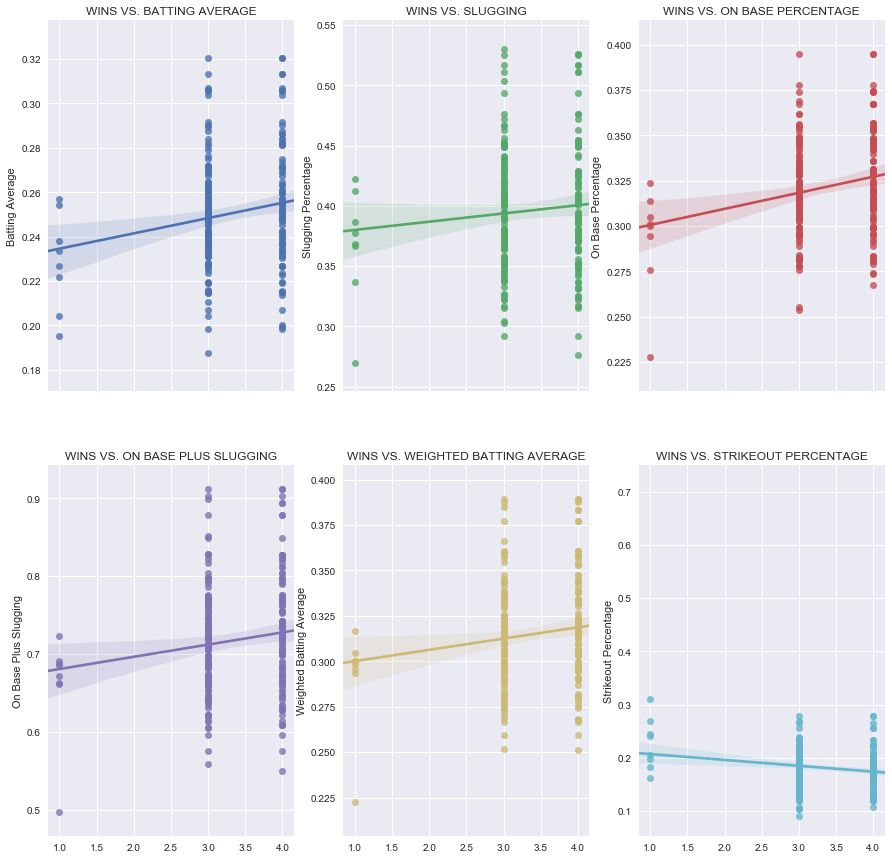

In [14]:
####### POSTSEASON STATS TO WINS ########

fig, ax = plt.subplots(2,3,figsize=(15,15), sharex = True)

sns.regplot(x='w', y='bat_avg', data=team_pb, ax=ax[0,0])
ax[0,0].set_title('WINS VS. BATTING AVERAGE')
ax[0,0].set_ylabel('Batting Average')
ax[0,0].set_xlabel('')

sns.regplot(x='w', y='slg', data=team_pb, ax=ax[0,1])
ax[0,1].set_title('WINS VS. SLUGGING')
ax[0,1].set_ylabel('Slugging Percentage')
ax[0,1].set_xlabel('')

sns.regplot(x='w', y='obp', data=team_pb, ax=ax[0,2])
ax[0,2].set_title('WINS VS. ON BASE PERCENTAGE')
ax[0,2].set_ylabel('On Base Percentage')
ax[0,2].set_xlabel('')

sns.regplot(x='w', y='ops', data=team_pb, ax=ax[1,0])
ax[1,0].set_title('WINS VS. ON BASE PLUS SLUGGING')
ax[1,0].set_ylabel('On Base Plus Slugging')
ax[1,0].set_xlabel('')

sns.regplot(x='w', y='woba', data=team_pb, ax=ax[1,1])
ax[1,1].set_title('WINS VS. WEIGHTED BATTING AVERAGE')
ax[1,1].set_ylabel('Weighted Batting Average')
ax[1,1].set_xlabel('')

sns.regplot(x='w', y='kperc', data=team_pb, ax=ax[1,2])
ax[1,2].set_title('WINS VS. STRIKEOUT PERCENTAGE')
ax[1,2].set_ylabel('Strikeout Percentage')
ax[1,2].set_xlabel('')
None